In [1]:
from sklearn import cluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re 
import random
from yellowbrick.cluster import KElbowVisualizer
kmeans = cluster.KMeans(n_clusters=2, max_iter=1000)

In [2]:
df=pd.read_csv("C:/Users/sylva/OneDrive/Bureau/barometre/donnees_brutes_2021.csv", sep=";")
variables = ['Commune', 'Code_INSEE', 'Commune_cp', 'Cp', 'Nom_dep',
       'Nom_region', 'Malvoyant', 'Taille_commune_2', 'Pratique de la marche',
       'Deplacement_a_pied_vie_courante', 'Deplacement_a_pied_loisir',
       'Lieu_marche', 'Deplacement_a_pied', 'Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information',
       'Resume_condition_marche', 'Endroit_problematique_pieton',
       'Buts_frequents_deplacements', 
       'Lors_de_vos_deplacements', 
       'Permis_de_conduire', 'Possedez-vous',
       'Abonnement_transport_commun', 'Membre_association_marche',
       'Membre_association_defense_pietons', 'Sexe_repondant', 'Age_repondant',
       'Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global',
       'Indicateur_global_declare']

C:\Users\sylva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
var_note =['Agencement_voirie', 'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information']

In [4]:
var_indicateur=['Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global']

In [5]:
def yo_float(x):
    return float(str(x).replace(',','.'))

def indicateurs_nombres(df1, liste_indicateur=var_indicateur):
    for indicateur in var_indicateur :
        if indicateur in df1.columns:
            df1[indicateur]=df1[indicateur].apply(yo_float)
    return df1
df=indicateurs_nombres(df)


In [6]:
p=re.compile('(\D*) \(([0-9]{2,2})[0-9]{3,3}\)')
def yo_ville(x):
    m=p.match(x)
    return m.group(1)+' ' +m.group(2)
df['Ville']=df['Commune'].apply(yo_ville)

In [7]:
df_note=df[var_note+['Commune']+['Ville']]
for col in df_note.columns:
    df_note=df_note[df_note[col].notna()]

def dataville_(df, commune='Ville', var_note=var_note) :
    liste_ville=df[commune].unique()
    grosse_ville=[]
    for ville in liste_ville :
        if df[df[commune]==ville][commune].count()>50 :
            grosse_ville+=[ville]#on va se concentrer sur les grandes villes
    dataville=pd.DataFrame()
    dataville[commune]=np.array(grosse_ville)
    for col in var_note:
        liste=[]
        liste_ecart=[]
        for ville in grosse_ville:
            moyenne=0
            nbre_reponse=0
            ecart_type=np.std(df[df[commune]==ville][col])
            for note in df[df[commune]==ville][col]:
                moyenne+=note
                nbre_reponse+=1
            liste.append(moyenne/nbre_reponse)
            liste_ecart.append(ecart_type)
        dataville[col]=np.array(liste)
        dataville[col+'std']=np.array(liste_ecart)
    return dataville
dataville=dataville_(df_note)

In [16]:
df.columns

Index(['Commune', 'Code_INSEE', 'Commune_cp', 'Dep', 'Cp', 'Nom_dep',
       'Nom_region', 'Malvoyant', 'Taille_commune_2', 'Pratique de la marche',
       'Deplacement_a_pied_vie_courante', 'Deplacement_a_pied_loisir',
       'Lieu_marche', 'Deplacement_a_pied', 'Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecout

In [17]:
df_cluster_etendu=df[var_note+['Membre_association_marche']]
for i in var_note:
    df_cluster_etendu=df_cluster_etendu[df_cluster_etendu[i].notna()]

In [18]:
df_cluster_etendu

,Agencement_voirie,conflits_pietons,Conducteurs_respectent,Circulation_vehicules_motorises,Deplacements_pied_commune,Marche_securite,Securite_rues_services,Securite_rues_residentielles,Securite_rejoindre_communes_voisines,Acces_pietons,Marche_separe_circulation,Marche_separe_autres_mobilites,Traverse_carrefour,Deplacements_enfants_personnes_agees,Deplacements_enfants_ecole,Pistes_cyclables,Espaces_pietons,Espaces_pietons_libres_empietements,Espaces_pietons_entretenus,Espaces_pietons_travaux,Signaletique_specifique,Amenagements_confort_marcheurs,Trottoirs_eclaires,Commune_ecoute_pietons,Commune_effort_marche,Situation_pietons,Promotion_deplacement,Stationnement_espaces_pietons,Acces_transport_commun,Signaletique,Information,Membre_association_marche
0,1.0,6.0,2.0,4.0,3.0,1.0,5.0,4.0,1.0,5.0,6.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,2.0,Non
1,6.0,3.0,4.0,4.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,6.0,6.0,5.0,4.0,3.0,Non
2,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,5.0,4.0,2.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,Non
3,6.0,6.0,6.0,5.0,4.0,6.0,6.0,5.0,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0,5.0,5.0,4.0,4.0,6.0,5.0,6.0,4.0,5.0,6.0,6.0,6.0,6.0,Non
5,4.0,4.0,5.0,3.0,5.0,6.0,5.0,5.0,3.0,4.0,6.0,6.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,6.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,5.0,4.0,3.0,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43258,5.0,1.0,1.0,1.0,1.0,3.0,6.0,5.0,3.0,4.0,6.0,6.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,3.0,5.0,3.0,4.0,1.0,6.0,5.0,2.0,Oui
43259,3.0,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.0,4.0,5.0,6.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,2.0,Non
43260,4.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,1.0,1.0,Oui
43261,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,Oui


In [47]:
kmeans = cluster.KMeans(n_clusters=2, max_iter=1000)
def clustering(df_cluster, var_note):
    kmeans.fit(df_cluster[var_note])
    idk = np.argsort(kmeans.labels_)#on trie les index
    #affichage des observations et leurs groupes
    clusters=pd.DataFrame(kmeans.labels_[idk], df_cluster.index[idk], columns=['Appartenance'])
    cluster_app=df_cluster.merge(clusters, right_index=True, left_index=True)
    #distances aux centres de classes des observations
    dist_centre=kmeans.transform(df_cluster[var_note])
    print(dist_centre.mean())
    return cluster_app
cluster_app_etendu=clustering(df_cluster_etendu, var_note)

7.976411299192464


In [41]:
centres=pd.DataFrame(kmeans.cluster_centers_, index=['0','1'],columns=var_note)
pd.set_option('display.max_columns', None)
display(centres)

,Agencement_voirie,conflits_pietons,Conducteurs_respectent,Circulation_vehicules_motorises,Deplacements_pied_commune,Marche_securite,Securite_rues_services,Securite_rues_residentielles,Securite_rejoindre_communes_voisines,Acces_pietons,Marche_separe_circulation,Marche_separe_autres_mobilites,Traverse_carrefour,Deplacements_enfants_personnes_agees,Deplacements_enfants_ecole,Pistes_cyclables,Espaces_pietons,Espaces_pietons_libres_empietements,Espaces_pietons_entretenus,Espaces_pietons_travaux,Signaletique_specifique,Amenagements_confort_marcheurs,Trottoirs_eclaires,Commune_ecoute_pietons,Commune_effort_marche,Situation_pietons,Promotion_deplacement,Stationnement_espaces_pietons,Acces_transport_commun,Signaletique,Information
0,4.381013,4.241392,4.104810,3.846203,3.690696,4.662089,4.973987,4.920316,3.933418,4.669937,5.129114,4.681582,4.046139,3.934684,4.030190,3.933038,4.033734,3.699367,4.452658,4.187658,3.778608,3.600063,4.128861,3.726962,3.984747,3.516582,3.590000,3.674937,5.077595,4.106203,3.780570
1,2.483072,2.871668,2.518757,2.446944,3.239763,3.033302,3.364216,3.325483,2.311298,3.238267,5.075193,4.549288,2.572616,2.129218,2.244528,2.753809,2.099075,1.868122,2.768715,2.547293,2.178257,2.158974,2.980385,2.016956,2.180861,2.495484,1.953233,1.965036,3.983155,2.588907,2.331246


In [42]:
acp=PCA(n_components=2)#une ACP sur deux axes afin de pouvoir la visualiser
proj=acp.fit_transform(df_cluster_etendu[var_note])

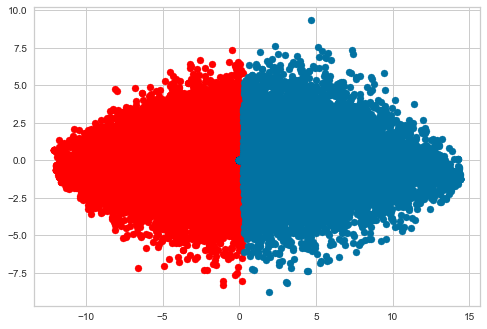

In [43]:
def nuagepoint(base, nbre_cluster=2) :
    proj0=[i[0] for i in proj]#on prend la projection sur l'axe des abcisses
    proj1=[i[1] for i in proj]#puis des ordonnées
    appartenance=np.array(base['Appartenance'])
    if nbre_cluster>2 :#avec des couleurs aléatoires
        for num_cluster in range(nbre_cluster) :
            appartenance=np.array((base['Appartenance']==num_cluster).astype(float))
            plt.scatter(proj0*appartenance, proj1*appartenance)#on projette les données du cluster
    else :#on prend les couleurs rouge et bleu
        plt.scatter(proj0*appartenance, proj1*appartenance, color='red')#on projette en rouge les membres du cluster 1
        plt.scatter(proj0*(1-appartenance), proj1*(1-appartenance))#en bleu ceux du 0
nuagepoint(cluster_app_etendu, nbre_cluster=2)#il y a juste n points en plus en (0,0), mais ils ne gênent pas la vision 

In [44]:
for i in cluster_app_etendu['Appartenance'].unique():
    clust=cluster_app_etendu[cluster_app_etendu['Appartenance']==i]
    nbre_membre=clust[clust['Membre_association_marche']=='Oui']['Membre_association_marche'].count()
    nbre_non=clust[clust['Membre_association_marche']=='Non']['Membre_association_marche'].count()
    print(i, 'nbre_membre', nbre_membre, 'nbre_non', nbre_non, 'proport', nbre_membre/(nbre_membre+nbre_non))

1 nbre_membre 3076 nbre_non 14944 proport 0.1706992230854606
0 nbre_membre 4730 nbre_non 11097 proport 0.2988563846591268


<ipython-input-53-0de4abcbe700>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[i]=np.array(liste)


0.4779755060627663


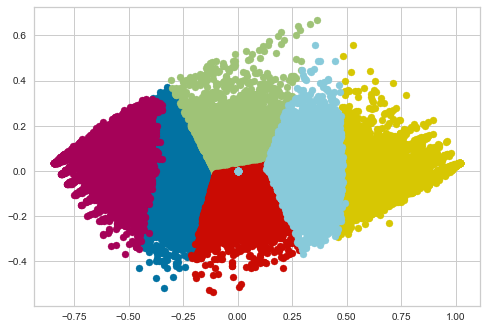

In [53]:
nbre_clusters=6
kmeans = cluster.KMeans(n_clusters=nbre_clusters, max_iter=1000)

df_cluster=df
for i in var_indicateur :
    liste=[]
    temp=df_cluster[i]
    del df_cluster[i]
    for j in temp:    
        liste.append(float(str(j).replace(',','.'))/6)
    df_cluster[i]=np.array(liste)
    df_cluster=df_cluster[df_cluster[i].notna()]

cluster_app=clustering(df_cluster, var_indicateur)
proj=acp.fit_transform(df_cluster[var_indicateur])
nuagepoint(cluster_app, nbre_cluster=nbre_clusters)

In [67]:
cluster_app['Lors_de_vos_deplacements'].unique()

array(["Un cycliste ou un utilisateur d'engin de déplacement personnel (vélo, trottinette, skate, roller…)",
       'Un marcheur, un piéton',
       'Un utilisateur des transports en commun',
       'Un utilisateur de véhicule motorisé (moto et autres deux roues, voitures à moteur à essence, gasoil...)',
       "Un utilisateur d'engin de déplacement personnel à assistance électrique (vélo, trottinette, skate électrique...)",
       'Une personne a mobilité réduite'], dtype=object)

In [70]:
for i in cluster_app['Appartenance'].unique():
    clust=cluster_app[cluster_app['Appartenance']==i]
    nbre_membre=clust[clust['Membre_association_marche']=='Oui']['Membre_association_marche'].count()
    nbre_non=clust[clust['Membre_association_marche']=='Non']['Membre_association_marche'].count()
    print(i, 'nbre_membre', nbre_membre, 'nbre_non', nbre_non, 'proport', nbre_membre/(nbre_membre+nbre_non))
    nbre_femme=clust[clust['Sexe_repondant']=='Femme']['Sexe_repondant'].count()
    nbre_homme=clust[clust['Sexe_repondant']=='Homme']['Sexe_repondant'].count()
    print(i, 'nbre_homme', nbre_homme, 'nbre_femme', nbre_femme, 'proport_femme', nbre_femme/(nbre_femme+nbre_homme))
    nbre_asso_pieton=clust[clust['Membre_association_defense_pietons']=='Oui']['Membre_association_defense_pietons'].count()
    nbre_non_asso_pieton=clust[clust['Membre_association_defense_pietons']=='Non']['Membre_association_defense_pietons'].count()
    print(i, 'nbre_asso_pieton', nbre_asso_pieton, 'nbre_non_asso_pieton', nbre_non_asso_pieton, 'proport_pieton', nbre_asso_pieton/(nbre_asso_pieton+nbre_non_asso_pieton))

for i in cluster_app['Appartenance'].unique():
    clust=cluster_app[cluster_app['Appartenance']==i]
    nbre_cycliste=clust[clust['Lors_de_vos_deplacements']=="Un cycliste ou un utilisateur d'engin de déplacement personnel (vélo, trottinette, skate, roller…)"]['Lors_de_vos_deplacements'].count()
    nbre_pieton=clust[clust['Lors_de_vos_deplacements']=='Un marcheur, un piéton']['Lors_de_vos_deplacements'].count()
    nbre_commun=clust[clust['Lors_de_vos_deplacements']=='Un utilisateur des transports en commun']['Lors_de_vos_deplacements'].count()
    nbre_motorise=clust[clust['Lors_de_vos_deplacements']=='Un utilisateur de véhicule motorisé (moto et autres deux roues, voitures à moteur à essence, gasoil...)']['Lors_de_vos_deplacements'].count()
    nbre_electrique=clust[clust['Lors_de_vos_deplacements']=="Un utilisateur d'engin de déplacement personnel à assistance électrique (vélo, trottinette, skate électrique...)"]['Lors_de_vos_deplacements'].count()
    nbre_reduite=clust[clust['Lors_de_vos_deplacements']=='Une personne a mobilité réduite']['Lors_de_vos_deplacements'].count()
    nbre_total=nbre_reduite+nbre_electrique+nbre_motorise+nbre_commun+nbre_pieton+nbre_cycliste
    print(i, 'pourcent_cycliste', nbre_cycliste/nbre_total, 'pourcent_pieton', nbre_pieton/nbre_total, 'pourcent_motorise', nbre_motorise/nbre_total, 'pourcent_electrique', nbre_electrique/nbre_total, 'pourcent_reduite', nbre_reduite/nbre_total)
    

1 nbre_membre 2047 nbre_non 4648 proport 0.30575056011949214
1 nbre_homme 2844 nbre_femme 3754 proport_femme 0.5689602909972719
1 nbre_asso_pieton 171 nbre_non_asso_pieton 6524 proport_pieton 0.025541448842419715
4 nbre_membre 1752 nbre_non 2762 proport 0.38812583074878154
4 nbre_homme 2125 nbre_femme 2351 proport_femme 0.5252457551385166
4 nbre_asso_pieton 44 nbre_non_asso_pieton 4470 proport_pieton 0.00974745237040319
5 nbre_membre 2971 nbre_non 5948 proport 0.33310909294763985
5 nbre_homme 3833 nbre_femme 5002 proport_femme 0.5661573288058857
5 nbre_asso_pieton 155 nbre_non_asso_pieton 8764 proport_pieton 0.017378629891243412
0 nbre_membre 1913 nbre_non 7820 proport 0.19654782698037604
0 nbre_homme 4212 nbre_femme 5365 proport_femme 0.5601963036441474
0 nbre_asso_pieton 461 nbre_non_asso_pieton 9272 proport_pieton 0.04736463577519778
3 nbre_membre 1044 nbre_non 4836 proport 0.17755102040816326
3 nbre_homme 2641 nbre_femme 3116 proport_femme 0.5412541254125413
3 nbre_asso_pieton 281 

Clustering par ville 

3.377519175999247


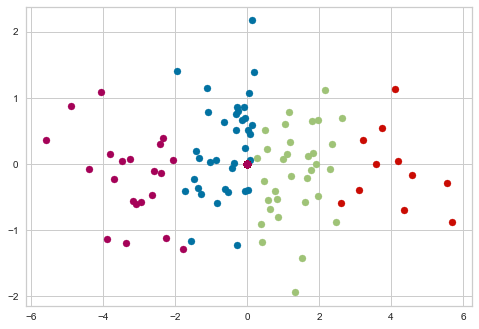

In [72]:
nbre_clusters=4
kmeans = cluster.KMeans(n_clusters=nbre_clusters, max_iter=1000)
ville_cluster=dataville[var_note]
ville_cluster_app=clustering(ville_cluster, var_note)
proj=acp.fit_transform(ville_cluster)
nuagepoint(ville_cluster_app, nbre_cluster=nbre_clusters)

In [73]:
centres=pd.DataFrame(kmeans.cluster_centers_, index=['0','1', '2', '4'],columns=var_note)
pd.set_option('display.max_columns', None)
display(centres)

,Agencement_voirie,conflits_pietons,Conducteurs_respectent,Circulation_vehicules_motorises,Deplacements_pied_commune,Marche_securite,Securite_rues_services,Securite_rues_residentielles,Securite_rejoindre_communes_voisines,Acces_pietons,Marche_separe_circulation,Marche_separe_autres_mobilites,Traverse_carrefour,Deplacements_enfants_personnes_agees,Deplacements_enfants_ecole,Pistes_cyclables,Espaces_pietons,Espaces_pietons_libres_empietements,Espaces_pietons_entretenus,Espaces_pietons_travaux,Signaletique_specifique,Amenagements_confort_marcheurs,Trottoirs_eclaires,Commune_ecoute_pietons,Commune_effort_marche,Situation_pietons,Promotion_deplacement,Stationnement_espaces_pietons,Acces_transport_commun,Signaletique,Information
0,3.483799,3.690515,3.391768,3.272950,3.339722,3.927080,4.297484,4.146475,3.002625,4.012390,5.082921,4.566524,3.302374,3.072424,3.159135,3.405042,3.101909,2.830386,3.718867,3.441927,3.053901,2.819868,3.518530,3.040509,3.199532,3.090116,2.900777,2.841327,4.574052,3.480680,3.164560
1,3.066297,3.285139,2.947270,2.803510,3.414983,3.531757,3.942952,3.793297,2.969445,3.701321,5.147342,4.685888,3.017289,2.702921,2.795499,3.169073,2.691227,2.372143,3.358628,3.121113,2.678074,2.613989,3.483400,2.501435,2.699353,2.841226,2.402406,2.475190,4.454180,2.967463,2.690673
2,2.424656,2.892720,2.471674,2.438499,3.483456,3.116323,3.320969,3.409404,2.779292,3.226774,4.964203,4.449158,2.774751,2.176773,2.347218,2.869093,2.001925,1.752019,2.546164,2.581835,2.117861,2.000632,2.869406,2.049798,2.169235,2.477433,1.937913,1.756392,4.039617,2.330115,2.052100
4,4.204632,3.853397,3.796664,3.533435,3.595274,4.379175,4.699253,4.569960,3.663588,4.491905,5.212710,4.765026,3.740389,3.710972,3.773560,3.717686,3.892628,3.499267,4.272105,3.926648,3.727223,3.451328,3.949519,3.450224,3.747357,3.346820,3.345182,3.454559,4.921798,3.936124,3.604640


In [17]:
acp.components_

array([[ 0.2450567 ,  0.13898013,  0.18701906,  0.16430948,  0.02309209,
         0.18065229,  0.18094624,  0.16744745,  0.13819445,  0.16825159,
         0.01591681,  0.02442482,  0.14603166,  0.21591272,  0.20385544,
         0.12095962,  0.2610312 ,  0.24360126,  0.22426238,  0.18371326,
         0.21102417,  0.18415357,  0.11716928,  0.20380929,  0.22090342,
         0.1130772 ,  0.19926389,  0.22893237,  0.1167687 ,  0.20807688,
         0.19093406],
       [ 0.06323706, -0.58242626, -0.25603071, -0.2256057 ,  0.27794694,
        -0.10047309,  0.04747915, -0.09878183,  0.14409123,  0.05793165,
         0.13434037,  0.21275524, -0.04896063, -0.04404338, -0.08475118,
        -0.09215503,  0.16695239, -0.10712484, -0.05476228, -0.07159182,
         0.20295547,  0.17893216,  0.18485407, -0.00786863,  0.08826945,
        -0.01127816,  0.11793082, -0.18499102,  0.28150416,  0.12923964,
         0.16314904]])

In [ ]:
df_indicateur=df[var_indicateur+['Commune']]
for col in df_indicateur.columns:
    df_indicateur=df_indicateur[df_indicateur[col].notna()]
    
dataville_glob=dataville_(df_indicateur, var_indicateur)


In [ ]:
nbre_clusters=4

kmeans = cluster.KMeans(n_clusters=nbre_clusters, max_iter=1000)
ville_cluster=dataville_glob[var_indicateur]
ville_cluster_app=clustering(ville_cluster)
proj=acp.fit_transform(ville_cluster)
nuagepoint(ville_cluster_app, nbre_cluster=nbre_clusters)

In [20]:
centres=pd.DataFrame(kmeans.cluster_centers_, index=['0','1', '2', '4'],columns=var_indicateur)
pd.set_option('display.max_columns', None)
display(centres)

,Indicateur_ressenti_global,Indicateur_securite,Indicateur_confort,Indicateur_effort_ville,Indicateur_amenagements_services,Indicateur_global
0,0.611750,0.624868,0.573793,0.542290,0.636511,0.597842
1,0.493624,0.507182,0.430134,0.367450,0.505506,0.460779
2,0.676504,0.697752,0.651248,0.613949,0.699792,0.667849
4,0.559566,0.576192,0.508349,0.464196,0.585627,0.538786


In [21]:
acp.components_


array([[ 0.35735001,  0.36248187,  0.42953713,  0.49201575,  0.3869823 ,
         0.40567341],
       [ 0.46601862,  0.31818822, -0.04898774,  0.10811505, -0.81698622,
         0.00526959]])

Graphique comparant une ville aux autres

In [30]:
dataville[dataville['Agencement_voiriestd']>1.5]

,Commune,Agencement_voirie,Agencement_voiriestd,conflits_pietons,conflits_pietonsstd,Conducteurs_respectent,Conducteurs_respectentstd,Circulation_vehicules_motorises,Circulation_vehicules_motorisesstd,Deplacements_pied_commune,...,Promotion_deplacement,Promotion_deplacementstd,Stationnement_espaces_pietons,Stationnement_espaces_pietonsstd,Acces_transport_commun,Acces_transport_communstd,Signaletique,Signaletiquestd,Information,Informationstd
44,Grenoble (38100),3.709677,1.555985,2.946237,1.533606,3.118280,1.207944,3.236559,1.139684,3.774194,...,3.655914,1.527487,3.322581,1.518072,5.182796,0.926854,3.870968,1.337835,3.505376,1.380538
52,L'Étang-la-Ville (78620),3.607843,1.522104,4.647059,1.355071,4.235294,1.245985,4.117647,1.165636,3.470588,...,3.117647,1.592224,3.372549,1.583751,4.431373,1.271943,3.137255,1.441943,2.686275,1.364683
89,Saint-Chamas (13250),3.111111,1.544176,3.539683,1.688668,3.269841,1.460662,3.380952,1.302361,3.698413,...,3.523810,1.401328,2.634921,1.535832,3.920635,1.324993,3.809524,1.456863,3.444444,1.342561
91,Saint-Louis (68300),3.537037,1.560068,3.388889,1.458267,3.092593,1.494044,3.111111,1.271725,3.185185,...,2.944444,1.458267,3.000000,1.503083,4.685185,1.214482,3.500000,1.301708,2.870370,1.440760


In [52]:
std=['Agencement_voiriestd','conflits_pietonsstd',     
    'Conducteurs_respectentstd','Circulation_vehicules_motorisesstd','Deplacements_pied_communestd', 
    'Marche_securitestd','Securite_rues_servicesstd', 'Securite_rues_residentiellesstd',
    'Securite_rejoindre_communes_voisinesstd',
    'Acces_pietonsstd', 'Marche_separe_circulationstd', 'Marche_separe_autres_mobilitesstd',
    'Traverse_carrefourstd', 'Deplacements_enfants_personnes_ageesstd', 
    'Deplacements_enfants_ecolestd', 'Pistes_cyclablesstd', 'Espaces_pietonsstd',
    'Espaces_pietons_libres_empietementsstd','Espaces_pietons_entretenusstd', 'Espaces_pietons_travauxstd',
    'Signaletique_specifiquestd', 'Amenagements_confort_marcheursstd','Trottoirs_eclairesstd', 
    'Commune_ecoute_pietonsstd', 'Commune_effort_marchestd', 'Situation_pietonsstd', 'Promotion_deplacementstd',
    'Stationnement_espaces_pietonsstd', 'Acces_transport_communstd', 'Signaletiquestd', 'Informationstd']
df_std=dataville[['Ville']+std]
for caract in std:
    print(caract)
    display(dataville[dataville[caract]>1.5][['Ville', caract[:len(caract)-3], caract]])
                 

Agencement_voiriestd


,Ville,Agencement_voirie,Agencement_voiriestd
47,L'Étang-la-Ville 78,3.607843,1.522104
80,Saint-Chamas 13,3.111111,1.544176
82,Saint-Louis 68,3.537037,1.560068


conflits_pietonsstd


,Ville,conflits_pietons,conflits_pietonsstd
2,Ajaccio 20,3.177778,1.546162
7,Antibes 06,3.188235,1.514589
10,Asnières-sur-Seine 92,2.544118,1.630895
13,Avon 77,3.270270,1.596426
19,Boulogne-Billancourt 92,3.103448,1.604838
43,Lambersart 59,3.890909,1.509638
58,Montreuil 93,2.965870,1.569394
65,Noisy-le-Sec 93,3.082353,1.520153
80,Saint-Chamas 13,3.539683,1.688668
94,Versailles 78,3.206642,1.510636


Conducteurs_respectentstd


,Ville,Conducteurs_respectent,Conducteurs_respectentstd
1,Aix-les-Bains 73,3.796296,1.556107
2,Ajaccio 20,2.955556,1.541364


Circulation_vehicules_motorisesstd


,Ville,Circulation_vehicules_motorises,Circulation_vehicules_motorisesstd


Deplacements_pied_communestd


,Ville,Deplacements_pied_commune,Deplacements_pied_communestd


Marche_securitestd


,Ville,Marche_securite,Marche_securitestd


Securite_rues_servicesstd


,Ville,Securite_rues_services,Securite_rues_servicesstd
10,Asnières-sur-Seine 92,3.117647,1.510059


Securite_rues_residentiellesstd


,Ville,Securite_rues_residentielles,Securite_rues_residentiellesstd
7,Antibes 06,3.235294,1.515776


Securite_rejoindre_communes_voisinesstd


,Ville,Securite_rejoindre_communes_voisines,Securite_rejoindre_communes_voisinesstd
0,Aix-en-Provence 13,2.461111,1.546911
1,Aix-les-Bains 73,3.314815,1.630997
13,Avon 77,3.121622,1.541785
17,Bois-le-Roi 77,3.581081,1.568325
31,Clermont-Ferrand 63,2.843478,1.501253
38,Gif-sur-Yvette 91,3.882353,1.628750
47,L'Étang-la-Ville 78,3.470588,1.512730
51,Maisons-Laffitte 78,3.250000,1.512448
53,Martigues 13,3.078431,1.506107
67,Pacé 35,3.230769,1.501479


Acces_pietonsstd


,Ville,Acces_pietons,Acces_pietonsstd
13,Avon 77,3.608108,1.531803


Marche_separe_circulationstd


,Ville,Marche_separe_circulation,Marche_separe_circulationstd


Marche_separe_autres_mobilitesstd


,Ville,Marche_separe_autres_mobilites,Marche_separe_autres_mobilitesstd
3,Alfortville 94,4.410000,1.523778
10,Asnières-sur-Seine 92,4.411765,1.507192
92,Troyes 10,4.470588,1.566849


Traverse_carrefourstd


,Ville,Traverse_carrefour,Traverse_carrefourstd


Deplacements_enfants_personnes_ageesstd


,Ville,Deplacements_enfants_personnes_agees,Deplacements_enfants_personnes_ageesstd
47,L'Étang-la-Ville 78,3.588235,1.536184


Deplacements_enfants_ecolestd


,Ville,Deplacements_enfants_ecole,Deplacements_enfants_ecolestd


Pistes_cyclablesstd


,Ville,Pistes_cyclables,Pistes_cyclablesstd
10,Asnières-sur-Seine 92,2.838235,1.530189
80,Saint-Chamas 13,3.206349,1.502999


Espaces_pietonsstd


,Ville,Espaces_pietons,Espaces_pietonsstd
82,Saint-Louis 68,3.166667,1.548596


Espaces_pietons_libres_empietementsstd


,Ville,Espaces_pietons_libres_empietements,Espaces_pietons_libres_empietementsstd
38,Gif-sur-Yvette 91,3.607843,1.522104
80,Saint-Chamas 13,2.714286,1.607804


Espaces_pietons_entretenusstd


,Ville,Espaces_pietons_entretenus,Espaces_pietons_entretenusstd
39,Grenoble 38,3.519031,1.519362
80,Saint-Chamas 13,3.984127,1.517015


Espaces_pietons_travauxstd


,Ville,Espaces_pietons_travaux,Espaces_pietons_travauxstd
13,Avon 77,3.121622,1.524154
17,Bois-le-Roi 77,3.270270,1.596426


Signaletique_specifiquestd


,Ville,Signaletique_specifique,Signaletique_specifiquestd
17,Bois-le-Roi 77,2.905405,1.645378
56,Montigny-le-Bretonneux 78,3.555556,1.511275
67,Pacé 35,3.557692,1.536898
97,Vincennes 94,3.576923,1.536056


Amenagements_confort_marcheursstd


,Ville,Amenagements_confort_marcheurs,Amenagements_confort_marcheursstd
42,La Rochelle 17,3.652778,1.5107


Trottoirs_eclairesstd


,Ville,Trottoirs_eclaires,Trottoirs_eclairesstd


Commune_ecoute_pietonsstd


,Ville,Commune_ecoute_pietons,Commune_ecoute_pietonsstd
17,Bois-le-Roi 77,2.878378,1.585003
39,Grenoble 38,3.299308,1.542489
47,L'Étang-la-Ville 78,3.352941,1.518817
67,Pacé 35,3.365385,1.519474
80,Saint-Chamas 13,3.365079,1.566531
90,Tournefeuille 31,3.390625,1.506415


Commune_effort_marchestd


,Ville,Commune_effort_marche,Commune_effort_marchestd
80,Saint-Chamas 13,3.698413,1.50802


Situation_pietonsstd


,Ville,Situation_pietons,Situation_pietonsstd


Promotion_deplacementstd


,Ville,Promotion_deplacement,Promotion_deplacementstd
1,Aix-les-Bains 73,3.388889,1.508208
20,Bourg-en-Bresse 01,3.621622,1.633291
39,Grenoble 38,3.449827,1.541269
47,L'Étang-la-Ville 78,3.117647,1.592224
56,Montigny-le-Bretonneux 78,2.962963,1.574836


Stationnement_espaces_pietonsstd


,Ville,Stationnement_espaces_pietons,Stationnement_espaces_pietonsstd
1,Aix-les-Bains 73,3.500000,1.607275
4,Amiens 80,2.414894,1.560207
16,Blagnac 31,3.040000,1.527001
17,Bois-le-Roi 77,3.000000,1.533412
21,Bourg-la-Reine 92,3.468750,1.550894
23,Bruz 35,3.308824,1.526794
25,Castelnau-le-Lez 34,2.259259,1.529769
29,Châtillon 92,2.903226,1.566206
38,Gif-sur-Yvette 91,3.843137,1.649391
46,Le Rheu 35,3.956044,1.554236


Acces_transport_communstd


,Ville,Acces_transport_commun,Acces_transport_communstd


Signaletiquestd


,Ville,Signaletique,Signaletiquestd
17,Bois-le-Roi 77,3.675676,1.543146


Informationstd


,Ville,Information,Informationstd


In [48]:
'Agencement_voiriestd'[:len('Agencement_voiriestd')-3]

'Agencement_voirie'

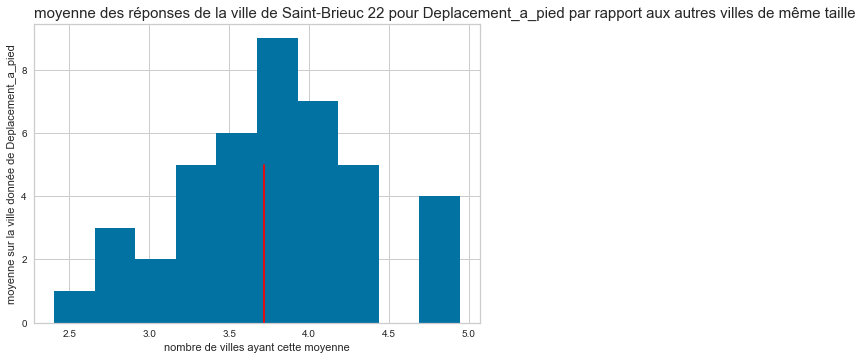

In [17]:
def graphique_ville(ville, indicateur,df=df, taille=False, ville_entiere=False):
    if ville_entiere :
        commune='Ville'
    else :
        commune='Commune'
    if taille :
        taille_commune=df[df[commune]==ville]['Taille_commune_2'].unique()[0]
        df_ville = df[df['Taille_commune_2']==taille_commune][[indicateur]+[commune]]
    else:
        df_ville=df[[indicateur]+[commune]]
    longueur=len(df_ville[commune].unique())*.1
    for col in df_ville.columns:
        df_ville=df_ville[df_ville[col].notna()]
    if df[df[commune]==ville][commune].count()<50 :
        print('pas assez de données pour avoir une bonne estimation ! (', df[df[commune]==ville][commune].count(), ' réponses)')
    
    data_par_ville=dataville_(df_ville, commune, [indicateur])
    valeur=data_par_ville[data_par_ville[commune]==ville][indicateur]
    histogram=data_par_ville[indicateur].hist()
    point=plt.plot([valeur, valeur], [0,5], color='red')
    plt.xlabel('nombre de villes ayant cette moyenne')
    plt.ylabel('moyenne sur la ville de '+ str(indicateur))
    title='moyenne des réponses de la ville de '+str(ville)+' pour ' + indicateur+' par rapport aux autres villes'
    if taille:
        title+=' de même taille'
    plt.title(title, fontsize = 15, horizontalalignment = 'left', loc = 'left')
    plt.show()
graphique_ville('Saint-Brieuc 22', 'Deplacement_a_pied', taille=True, ville_entiere=True)

Analyse des différentes réponses selon les caractéristiques

In [8]:
def constr_base(variables, variable_interet, base=df):
    df_base=df[variables+[variable_interet]]
    for col in df_base.columns:
        df_base=df_base[df_base[col].notna()]
    return df_base, variables, variable_interet

def datacarac_(base, variables, variable_interet) :
    liste_carac=base[variable_interet].unique()
    gros_carac=[]
    for carac in liste_carac :
        if base[base[variable_interet]==carac][variable_interet].count()>100 :
            gros_carac+=[carac]#on va se concentrer sur les caractères répandus
    datacarac=pd.DataFrame()
    datacarac[variable_interet]=np.array(gros_carac)
    for col in variables:
        liste=[]
        for carac in gros_carac:
            moyenne=0
            nbre_reponse=0
            for note in base[base[variable_interet]==carac][col]:
                moyenne+=note
                nbre_reponse+=1
            liste.append(moyenne/nbre_reponse)
        datacarac[col]=np.array(liste)
    return datacarac

def base_carac_(variables, variable_interet, base=df):
    (df_base, variables, variable_interet)=constr_base(variables, variable_interet, base=df)
    return datacarac_(base=df_base, variables=variables, variable_interet=variable_interet)

In [9]:
base_carac=base_carac_(['Deplacements_enfants_ecole'], 'Sexe_repondant', df)

In [10]:
(df_base, variables, variable_interet)=constr_base(var_indicateur, 'Sexe_repondant', df)

In [11]:
base_carac

,Sexe_repondant,Deplacements_enfants_ecole
0,Femme,3.116662
1,Homme,3.137728
2,Ne souhaite pas répondre,2.837209


In [28]:
base_carac=base_carac_(['Deplacements_enfants_ecole'], 'Age_repondant', df)
base_carac

,Age_repondant,Deplacements_enfants_ecole
0,De 45 à 54 ans,3.021904
1,De 65 à 74 ans,3.402557
2,De 35 à 44 ans,2.762505
3,De 26 à 34 ans,2.896395
4,75 ans et plus,3.448958
5,De 55 à 64 ans,3.198784
6,De 18 à 25 ans,3.381713
7,Moins de 18 ans,3.519481


In [12]:
df_car=df[['Commune', 'Malvoyant', 'Taille_commune_2', 'Pratique de la marche',
       'Deplacement_a_pied_vie_courante', 'Deplacement_a_pied_loisir',
       'Lieu_marche', 'Deplacement_a_pied', 'Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information',
       'Resume_condition_marche',
       'Membre_association_marche',
       'Membre_association_defense_pietons', 'Sexe_repondant', 'Age_repondant',
       'Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global',
       'Indicateur_global_declare', 'Ville']]

In [19]:

for col in df_car.columns:
    df_car=df_car[df_car[col].notna()]

def tt_dataville_(df, commune='Ville', var_note=var_note) :
    liste_ville=df[commune].unique()
    grosse_ville=[]
    for ville in liste_ville :
        if df_car[df_car[commune]==ville][commune].count()>=50 :
            grosse_ville+=[ville]#on va se concentrer sur les grandes villes
    dataville=pd.DataFrame()
    dataville[commune]=np.array(grosse_ville)
    for col in var_note:
        liste=[]
        liste_ecart=[]
        
        for ville in grosse_ville:
            donnees=df[df[commune]==ville]
            moyenne=0
            nbre_reponse=0
            ecart_type=np.std(donnees[col])
            for note in donnees[col]:
                moyenne+=note
                nbre_reponse+=1
            liste.append(moyenne/nbre_reponse)
            liste_ecart.append(ecart_type)
        dataville[col]=np.array(liste)
        dataville[col+'std']=np.array(liste_ecart)
        
    liste_femme=[]
    liste_marcheur=[]
    liste_nombre=[]
    for ville in grosse_ville:
        donnees=df[df[commune]==ville]
        nbre_femme=sum(donnees['Sexe_repondant']=='Femme')
        nbre_homme=sum(donnees['Sexe_repondant']=='Homme')
        nbre_marcheur=sum(donnees['Membre_association_marche']=='Oui')
        nbre_non_marcheur=sum(donnees['Membre_association_marche']=='Non')
        liste_femme.append(nbre_femme/(nbre_femme+nbre_homme))
        liste_marcheur.append(nbre_marcheur/(nbre_marcheur+nbre_non_marcheur))
        liste_nombre.append(nbre_non_marcheur)
    dataville['pourcent_femme']=np.array(liste_femme)
    dataville['pourcent_marcheur']=np.array(liste_marcheur)
    dataville['nombre_non_marcheur']=np.array(liste_nombre)
    return dataville
dataville=tt_dataville_(df_car, var_note=['Deplacements_pied_commune'])

In [20]:
dataville

,Ville,Deplacements_pied_commune,Deplacements_pied_communestd,pourcent_femme,pourcent_marcheur,nombre_non_marcheur
0,Aix-en-Provence 13,3.422222,1.144822,0.583333,0.283333,129
1,Aix-les-Bains 73,3.462963,1.031234,0.500000,0.148148,46
2,Ajaccio 20,2.422222,1.021739,0.586207,0.066667,84
3,Alfortville 94,3.990000,1.292246,0.626263,0.100000,90
4,Amiens 80,3.085106,1.117173,0.419355,0.138298,81
...,...,...,...,...,...,...
97,Villeurbanne 69,3.819608,1.187685,0.588710,0.090196,232
98,Vincennes 94,4.576923,0.967673,0.634615,0.211538,41
99,Vitré 35,2.923077,1.071414,0.609375,0.092308,59
100,Vitrolles 13,3.053571,1.092501,0.722222,0.142857,48
